In [4]:
import os
import tarfile
from six.moves import urllib # type: ignore

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)

    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)

    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

In [5]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


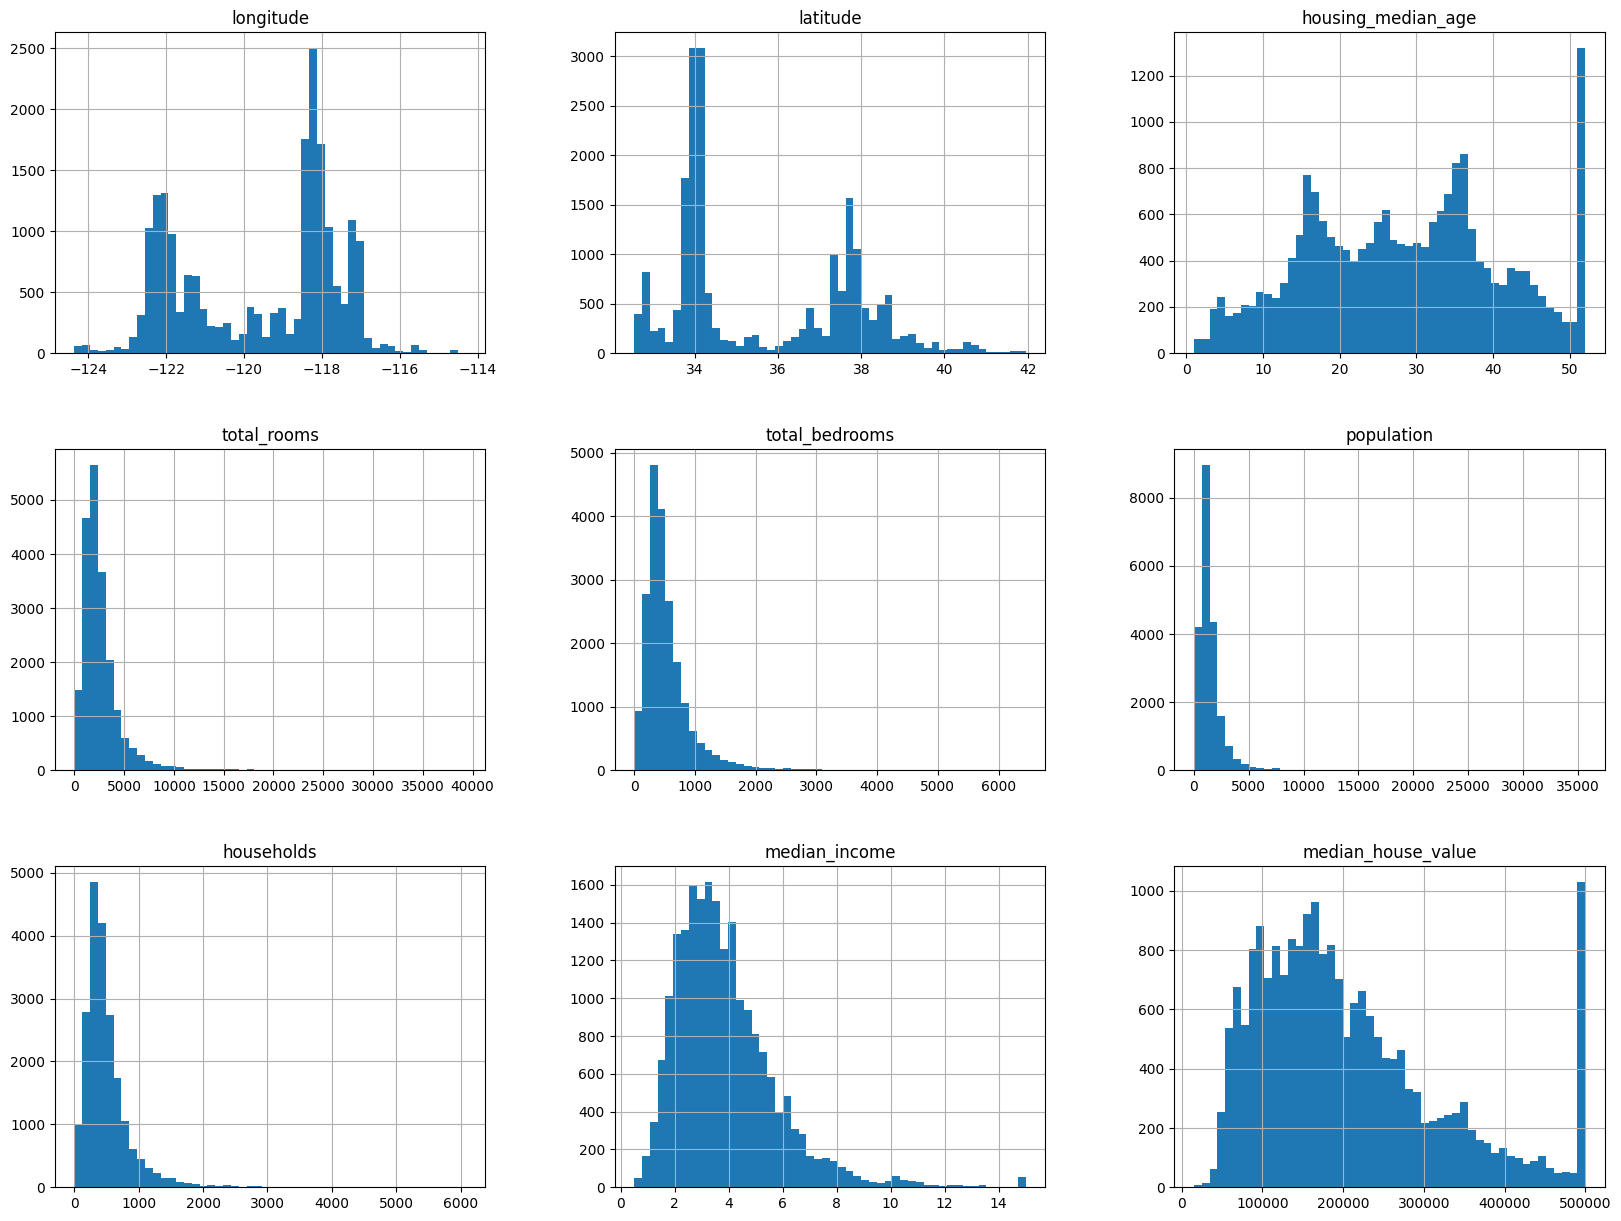

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))

plt.show()

In [11]:
housing.sort_values(by="housing_median_age", ascending=False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
18881,-122.25,38.10,52.0,248.0,86.0,173.0,69.0,2.3000,109400.0,NEAR BAY
1671,-122.21,38.06,52.0,2735.0,559.0,1076.0,487.0,3.6154,155700.0,NEAR BAY
19116,-122.65,38.23,52.0,1735.0,347.0,712.0,343.0,3.1711,200800.0,<1H OCEAN
19516,-121.01,37.64,52.0,201.0,35.0,74.0,22.0,1.3036,75000.0,INLAND
16200,-121.27,37.95,52.0,1318.0,308.0,1368.0,310.0,1.8261,54600.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
12077,-117.64,33.87,2.0,17470.0,2727.0,5964.0,1985.0,6.2308,257900.0,<1H OCEAN
18972,-122.00,38.23,1.0,2062.0,343.0,872.0,268.0,5.2636,191300.0,INLAND
12286,-116.95,33.86,1.0,6.0,2.0,8.0,2.0,1.6250,55000.0,INLAND
3130,-117.95,35.08,1.0,83.0,15.0,32.0,15.0,4.8750,141700.0,INLAND


In [12]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]

    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
train_set, test_set = split_train_test(housing, 0.2)

display(len(train_set))
display(len(test_set))

16512

4128

In [14]:
from zlib import crc32

def test_set_check(indentifier, test_ratio):
    return crc32(np.int64(indentifier)) & 0xffffffff < test_ratio * 2**32 # type: ignore

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))

    return data.loc[-in_test_set], data.loc[in_test_set]

In [15]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [16]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [17]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

/tmp/ipykernel_984/3717329313.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)


<Axes: >

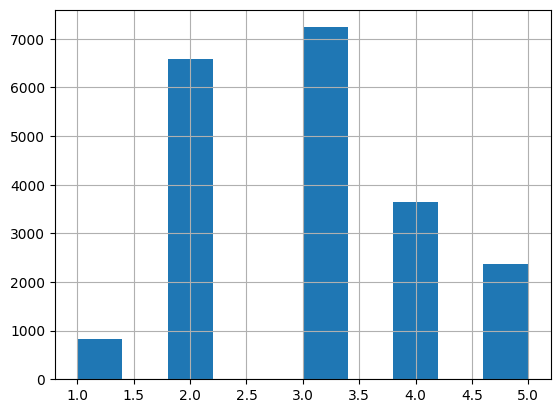

In [18]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

housing["income_cat"].hist()

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [20]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: count, dtype: float64

In [21]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

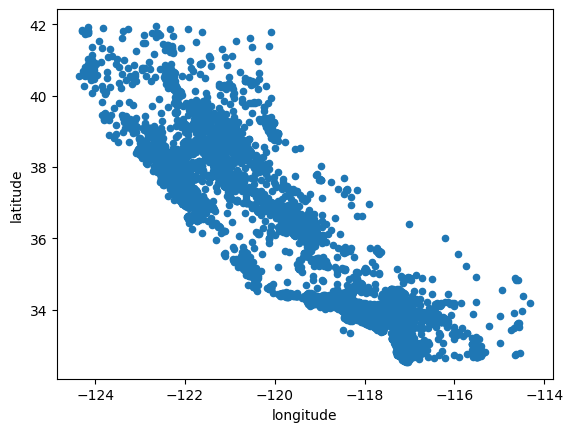

In [22]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

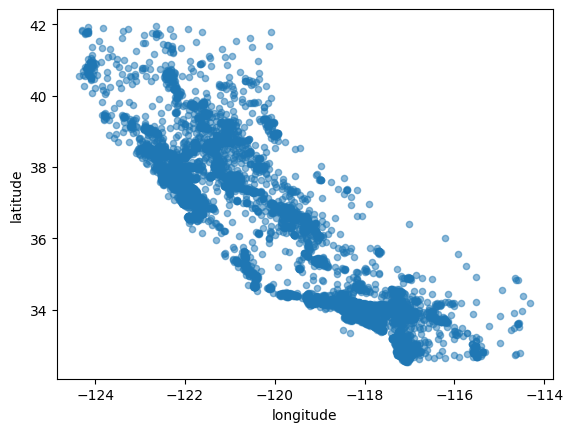

In [23]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.5)

<Axes: xlabel='longitude', ylabel='latitude'>

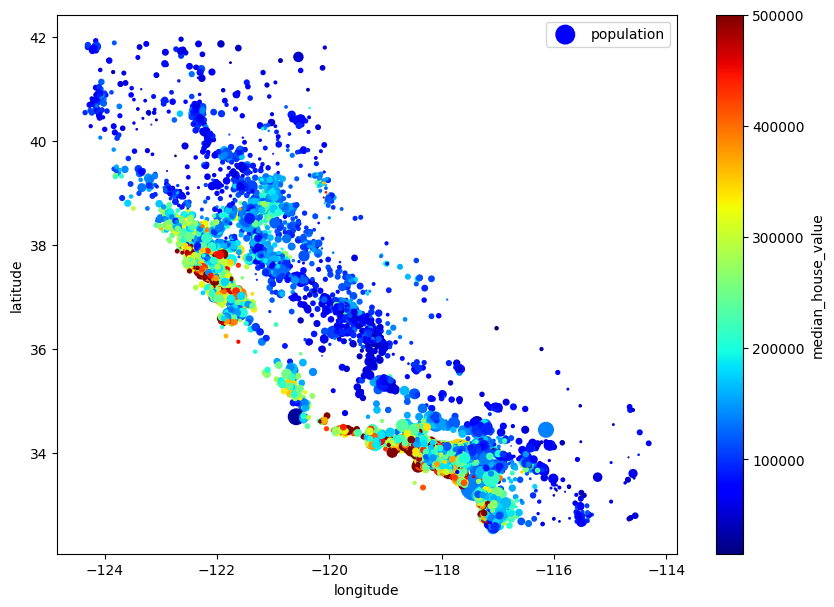

In [24]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=1,
             s=housing["population"] / 100, label="population", figsize=(10, 7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             )

In [25]:
housing_wo_cat = housing.drop("ocean_proximity", axis=1)
corr_matrix = housing_wo_cat.corr()
display(corr_matrix)
corr_matrix["median_house_value"].sort_values(ascending=False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466,-0.016281
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673,-0.078768
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146,-0.139314
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140,0.221745
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781,0.012635
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882,0.022900
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590,0.035115
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151,0.902151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000,0.642256
income_cat,-0.016281,-0.078768,-0.139314,0.221745,0.012635,0.022900,0.035115,0.902151,0.642256,1.000000


median_house_value    1.000000
median_income         0.687151
income_cat            0.642256
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

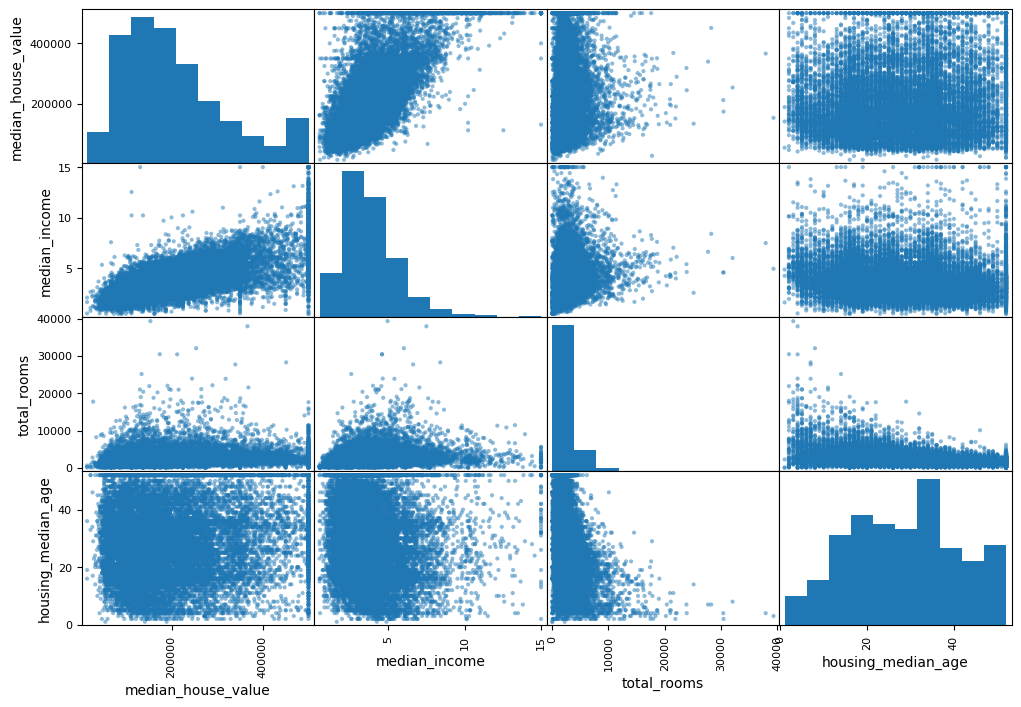

In [26]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

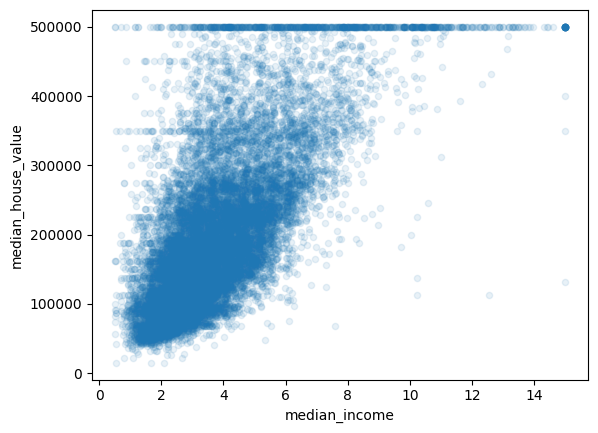

In [27]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [28]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [29]:
housing_wo_cat = housing.drop(housing.columns[[9]], axis=1)
corr_matrix = housing_wo_cat.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
income_cat                  0.642256
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [30]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,3.006783
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,1.054600
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,1.000000
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,2.000000
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,3.000000
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,4.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,5.000000


In [31]:
nas = housing["total_bedrooms"].isnull()
housing["total_bedrooms"].loc[nas].head(20)

# Option 1:
# housing.dropna(subset=["total_bedrooms"], inplace=True)

# Option 2:
# housing.drop("total_bedrooms", axis=1, inplace=True)

# Option 3:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

display(housing["total_bedrooms"].loc[nas].head(20))
housing.describe()

/tmp/ipykernel_984/2403612120.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(median, inplace=True)


1606     433.0
10915    433.0
19150    433.0
4186     433.0
16885    433.0
11512    433.0
13069    433.0
4743     433.0
19607    433.0
10236    433.0
9814     433.0
16038    433.0
7547     433.0
16880    433.0
15975    433.0
13706    433.0
290      433.0
15607    433.0
2323     433.0
341      433.0
Name: total_bedrooms, dtype: float64

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,533.939438,1419.687379,497.011810,3.875884,3.006783
std,2.001828,2.137963,12.574819,2138.417080,410.806260,1115.663036,375.696156,1.904931,1.054600
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,1.000000
25%,-121.800000,33.940000,18.000000,1443.000000,296.000000,784.000000,279.000000,2.566950,2.000000
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,3.000000
75%,-118.010000,37.720000,37.000000,3141.000000,641.000000,1719.000000,602.000000,4.745325,4.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,5.000000


In [32]:
from sklearn.impute import SimpleImputer as Imputer

imputer = Imputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [33]:
display(imputer.statistics_)
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155,    3.     ])

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155,    3.     ])

In [34]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, index=housing_num.index, columns=housing_num.columns) # type: ignore

In [35]:
housing_cat =  housing["ocean_proximity"]
housing_cat.head(20)

12655        INLAND
15502    NEAR OCEAN
2908         INLAND
14053    NEAR OCEAN
20496     <1H OCEAN
1481       NEAR BAY
18125     <1H OCEAN
5830      <1H OCEAN
17989     <1H OCEAN
4861      <1H OCEAN
20615        INLAND
11493     <1H OCEAN
12386        INLAND
2167         INLAND
14562    NEAR OCEAN
17821     <1H OCEAN
7667      <1H OCEAN
10779     <1H OCEAN
9390       NEAR BAY
11063     <1H OCEAN
Name: ocean_proximity, dtype: object

In [36]:
housing_cat_enocded, housing_categories = housing_cat.factorize()

display(housing_cat_enocded[:10])
housing_categories

array([0, 1, 0, 1, 2, 3, 2, 2, 2, 2])

Index(['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')

In [37]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_enocded.reshape(-1, 1))

display(housing_cat_1hot)
housing_cat_1hot.toarray()

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [38]:
from sklearn.preprocessing import OneHotEncoder as CategoricalEncoder

cat_enocder = CategoricalEncoder(sparse_output=False)
housing_cat_reshpaed = housing_cat.values.reshape(-1, 1)

housing_cat_1hot = cat_enocder.fit_transform(housing_cat_reshpaed)

display(housing_cat_1hot)
cat_enocder.categories_

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [39]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,2.0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,5.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND,2.0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,2.0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,3.0
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN,4.0
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND,2.0
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN,3.0
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN,3.0


In [40]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]

        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]

            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

num_pipeline = Pipeline([
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)


In [42]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

In [43]:
print(list(housing_num))

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'income_cat']


In [44]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', OneHotEncoder(sparse_output=False))
])

In [45]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)
])

In [46]:
housing_prepared = full_pipeline.fit_transform(housing) # training
# housing_prepared = full_pipeline.transform(housing) # validation

display(housing_prepared)
housing_prepared.shape

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

(16512, 17)

In [47]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(n_jobs=-1)
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(n_jobs=-1)

In [48]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

print("Labels:", list(some_labels))

Predictions: [ 83811.08312039 314388.27147935 145641.85902864 183704.64921202
 238729.66725745]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [49]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68376.51254853733

In [50]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [51]:
housing_predictions = tree_reg.predict(housing_prepared)

tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [52]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10, n_jobs=-1)
tree_rmse_scores = np.sqrt(-scores)

In [53]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [72304.81575775 70099.99324583 68961.97279654 71502.80576414
 68991.39972326 78153.17227689 70705.63979894 74107.34859381
 68480.96959927 70452.49133185]
Mean: 71376.06088882711
Standard Deviation: 2776.5914125791796


In [54]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10, n_jobs=-1)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71523.78333874 64044.46774989 67454.97869698 68514.10137273
 66303.62531226 72166.63405138 74464.08841381 68570.11804395
 66063.64175868 69870.86192291]
Mean: 68897.63006613276
Standard Deviation: 3002.746127534868


In [55]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_jobs=-1)
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)

forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10, n_jobs=-1)

forest_rmse_scores = np.sqrt(-forest_scores)

display(forest_rmse)
display_scores(forest_rmse_scores)

18695.22550617836

Scores: [51488.18090457 48973.89376177 46618.93735068 51407.87858904
 47310.55830839 52014.864116   52140.98174413 49542.43745367
 48368.21466302 53826.04862051]
Mean: 50169.199551177946
Standard Deviation: 2231.194972639439


In [56]:
import joblib

joblib.dump(forest_reg, "forest_reg.pkl")
forest_reg_loaded = joblib.load("forest_reg.pkl")

In [57]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [30, 100, 300], 'max_features': [7, 8, 9]},
    {'bootstrap': [False], 'n_estimators': [30, 100, 300], 'max_features': [7, 8, 9]}
]

forest_reg = RandomForestRegressor(n_jobs=-1)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
             param_grid=[{'max_features': [7, 8, 9],
                          'n_estimators': [30, 100, 300]},
                         {'bootstrap': [False], 'max_features': [7, 8, 9],
                          'n_estimators': [30, 100, 300]}],
             scoring='neg_mean_squared_error')

In [58]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 7, 'n_estimators': 300}

In [59]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=7, n_estimators=300,
                      n_jobs=-1)

In [60]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

50563.96747956615 {'max_features': 7, 'n_estimators': 30}
49987.06201786686 {'max_features': 7, 'n_estimators': 100}
49862.97735440371 {'max_features': 7, 'n_estimators': 300}
50921.48078539454 {'max_features': 8, 'n_estimators': 30}
50128.769503980075 {'max_features': 8, 'n_estimators': 100}
49879.345607485644 {'max_features': 8, 'n_estimators': 300}
50608.5393748996 {'max_features': 9, 'n_estimators': 30}
50156.140462587886 {'max_features': 9, 'n_estimators': 100}
49835.643920201015 {'max_features': 9, 'n_estimators': 300}
50275.106984923026 {'bootstrap': False, 'max_features': 7, 'n_estimators': 30}
49510.87164559728 {'bootstrap': False, 'max_features': 7, 'n_estimators': 100}
49351.71764557677 {'bootstrap': False, 'max_features': 7, 'n_estimators': 300}
50228.01536140746 {'bootstrap': False, 'max_features': 8, 'n_estimators': 30}
49670.15122008238 {'bootstrap': False, 'max_features': 8, 'n_estimators': 100}
49483.88419926385 {'bootstrap': False, 'max_features': 8, 'n_estimators': 3

In [61]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from scipy.stats import uniform

# forest_reg = XGBRegressor(device='cuda', n_jobs=-1)
forest_reg = RandomForestRegressor(n_jobs=-1)

param_grid = [
    {'n_estimators': np.arange(3, 100, 1), 'max_features': np.arange(2, 20, 1)},
    {'bootstrap': [False], 'n_estimators': np.arange(3, 100, 1), 'max_features': np.arange(2, 20, 1)}
]


random_search = RandomizedSearchCV(forest_reg, param_grid, n_iter=100, n_jobs=-1, cv=5,
                                   scoring='neg_mean_squared_error')

random_search.fit(housing_prepared, housing_labels)

/home/bill/.local/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_iter=100,
                   n_jobs=-1,
                   param_distributions=[{'max_features': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                         'n_estimators': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54...
                                         'max_features': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                         'n_estimators': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])}],
                   scoring='neg_mean_squared_error')

In [62]:
cvres = random_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

50122.10159878847 {'n_estimators': 72, 'max_features': 11}
50596.7143827198 {'n_estimators': 48, 'max_features': 3, 'bootstrap': False}
51071.55049711148 {'n_estimators': 33, 'max_features': 16}
50237.6671750903 {'n_estimators': 94, 'max_features': 12}
49870.021308530835 {'n_estimators': 37, 'max_features': 5, 'bootstrap': False}
51999.93854826473 {'n_estimators': 41, 'max_features': 13, 'bootstrap': False}
49968.53789746562 {'n_estimators': 33, 'max_features': 7, 'bootstrap': False}
68149.50403707087 {'n_estimators': 97, 'max_features': 19, 'bootstrap': False}
50247.86072312178 {'n_estimators': 80, 'max_features': 10, 'bootstrap': False}
50630.63944525704 {'n_estimators': 86, 'max_features': 15}
50571.91487133638 {'n_estimators': 88, 'max_features': 15}
50437.694082626644 {'n_estimators': 98, 'max_features': 3, 'bootstrap': False}
50104.46612160863 {'n_estimators': 91, 'max_features': 10, 'bootstrap': False}
53865.733002353285 {'n_estimators': 12, 'max_features': 3}
51400.03680768176 

In [63]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.97635933e-02, 6.29486591e-02, 4.40408340e-02, 1.60791016e-02,
       1.57615955e-02, 1.60208950e-02, 1.55093152e-02, 2.75157155e-01,
       1.42307129e-01, 4.05158219e-02, 1.06661507e-01, 4.57744126e-02,
       7.57121838e-03, 1.35355468e-01, 1.02851190e-04, 2.52806161e-03,
       3.90238156e-03])

In [64]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

cat_enocder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs = list(cat_enocder.categories_[0])

attributes = num_attribs + extra_attribs + cat_one_hot_attribs

sorted(zip(feature_importances, attributes), reverse=True)

[(0.2751571553355591, 'median_income'),
 (0.14230712851881686, 'income_cat'),
 (0.1353554680933389, 'INLAND'),
 (0.10666150721031019, 'pop_per_hhold'),
 (0.06976359329452861, 'longitude'),
 (0.06294865908702274, 'latitude'),
 (0.045774412560829154, 'bedrooms_per_room'),
 (0.0440408340392241, 'housing_median_age'),
 (0.04051582187044962, 'rooms_per_hhold'),
 (0.016079101567425723, 'total_rooms'),
 (0.016020895006671115, 'population'),
 (0.01576159545821597, 'total_bedrooms'),
 (0.015509315221508075, 'households'),
 (0.007571218376696649, '<1H OCEAN'),
 (0.0039023815598141992, 'NEAR OCEAN'),
 (0.0025280616091163505, 'NEAR BAY'),
 (0.00010285119047260498, 'ISLAND')]

In [65]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared) # type: ignore

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [66]:
final_rmse

46985.757322424804

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [
    {'kernel': ['linear'], 'C': [10, 30, 100, 300, 1000, 3000, 10000, 300000]},
    {'kernel': ['rbf'], 'C': [1, 3, 10, 30, 100, 300, 1000], 'gamma': [0.01, 0.03, 0.1, 0.3, 1, 3]}
]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[CV] END ................................C=10, kernel=linear; total time=   9.7s
[CV] END ................................C=10, kernel=linear; total time=  11.8s
[CV] END ................................C=30, kernel=linear; total time=  12.7s
[CV] END ................................C=10, kernel=linear; total time=  12.8s
[CV] END ................................C=10, kernel=linear; total time=  12.9s
[CV] END ...............................C=100, kernel=linear; total time=  13.5s
[CV] END ..............................C=1000, kernel=linear; total time=  13.5s
[CV] END ...............................C=300, kernel=linear; total time=  13.8s
[CV] END ...............................C=300, kernel=linear; total time=  15.2s
[CV] END ...............................C=100, kernel=linear; total time=  15.3s
[CV] END ................................C=30, kernel=linear; total time=  15.3s
[CV] END ...............................C=300, kernel=linear; total time=  15.4s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': [10, 30, 100, 300, 1000, 3000, 10000, 300000],
                          'kernel': ['linear']},
                         {'C': [1, 3, 10, 30, 100, 300, 1000],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1, 3],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [68]:
negative_mse = grid_search.best_score_

rmse = np.sqrt(-negative_mse)
rmse

70279.30953970845

In [69]:
grid_search.best_params_

{'C': 1000, 'kernel': 'linear'}

In [70]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

param_distribs = {
    'kernel': ['linear', 'rbf'],
    'C': reciprocal(20, 200000),
    'gamma': expon(scale=1)
}

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5,
                                scoring='neg_mean_squared_error', verbose=2, 
                                n_jobs=-1, random_state=42)

rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[CV] END C=432.37884813148844, gamma=0.15416196746656105, kernel=linear; total time=  11.3s
[CV] END C=629.7823295913721, gamma=3.010121430917521, kernel=linear; total time=  12.1s
[CV] END C=629.7823295913721, gamma=3.010121430917521, kernel=linear; total time=  12.6s
[CV] END C=629.7823295913721, gamma=3.010121430917521, kernel=linear; total time=  13.4s
[CV] END C=432.37884813148844, gamma=0.15416196746656105, kernel=linear; total time=  14.1s
[CV] END C=629.7823295913721, gamma=3.010121430917521, kernel=linear; total time=  14.5s
[CV] END C=432.37884813148844, gamma=0.15416196746656105, kernel=linear; total time=  15.2s
[CV] END C=84.14107900575871, gamma=0.059838768608680676, kernel=rbf; total time=  15.6s
[CV] END C=432.37884813148844, gamma=0.15416196746656105, kernel=linear; total time=  16.8s
[CV] END C=24.175082946113903, gamma=3.503557475158312, kernel=rbf; total time=  17.4s
[CV] END C=84.14107900575871, gamma=0.059838768608680676, kernel=rbf; total time=  17.9s
[CV] END C=

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7faf0ceb7610>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7faf0ce9a510>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [71]:
negative_mse = rnd_search.best_score_

rmse = np.sqrt(-negative_mse)
rmse

55218.27407578036

In [72]:
rnd_search.best_params_

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

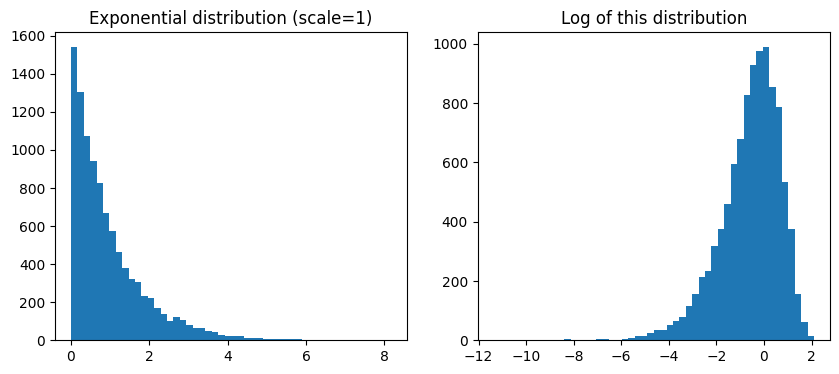

In [73]:
expon_distrib = expon(scale=1)
samples = expon_distrib.rvs(10000, random_state=42)

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.title("Exponential distribution (scale=1)")
plt.hist(samples, bins=50)

plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)

plt.show()

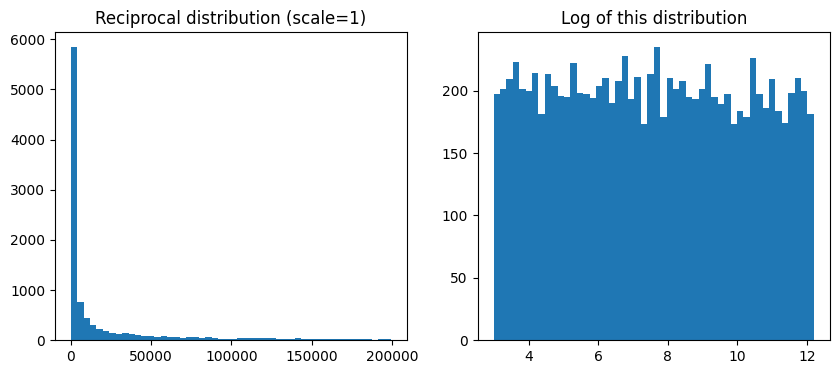

In [74]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.title("Reciprocal distribution (scale=1)")
plt.hist(samples, bins=50)

plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)

plt.show()

In [75]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k

    def fit(self, X, y=None):
        self.feature_indices_= indices_of_top_k(self.feature_importances, self.k)
        return self
    
    def transform(self, X):
        return X[:, self.feature_indices_]

In [76]:
k = 5

top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  7,  8, 10, 13])

In [89]:
arr = feature_importances

display(np.array(arr))
np.argpartition(np.array(arr), -k)

array([6.97635933e-02, 6.29486591e-02, 4.40408340e-02, 1.60791016e-02,
       1.57615955e-02, 1.60208950e-02, 1.55093152e-02, 2.75157155e-01,
       1.42307129e-01, 4.05158219e-02, 1.06661507e-01, 4.57744126e-02,
       7.57121838e-03, 1.35355468e-01, 1.02851190e-04, 2.52806161e-03,
       3.90238156e-03])

array([12, 16,  2,  3,  4,  5,  6, 15,  1,  9, 14, 11,  0, 13, 10,  7,  8])

In [90]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'median_income', 'income_cat', 'pop_per_hhold',
       'INLAND'], dtype='<U18')

In [91]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.2751571553355591, 'median_income'),
 (0.14230712851881686, 'income_cat'),
 (0.1353554680933389, 'INLAND'),
 (0.10666150721031019, 'pop_per_hhold'),
 (0.06976359329452861, 'longitude')]

In [92]:
preperation_and_feature_selection_pipeline = Pipeline([
    ('preperation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [93]:
housing_prepared_top_k_features = preperation_and_feature_selection_pipeline.fit_transform(housing)
housing_prepared_top_k_features

array([[-0.94135046, -0.8936472 , -0.95468705,  0.00622264,  1.        ],
       [ 1.17178212,  1.292168  ,  1.89007821, -0.04081077,  0.        ],
       [ 0.26758118, -0.52543365, -0.95468705, -0.07537122,  1.        ],
       ...,
       [-1.5707942 , -0.36547546, -0.00643196, -0.03743619,  0.        ],
       [-1.56080303,  0.16826095, -0.00643196, -0.05915604,  0.        ],
       [-1.28105026, -0.390569  , -0.00643196,  0.00657083,  1.        ]])

In [94]:
housing_prepared[0:3, top_k_feature_indices]

array([[-0.94135046, -0.8936472 , -0.95468705,  0.00622264,  1.        ],
       [ 1.17178212,  1.292168  ,  1.89007821, -0.04081077,  0.        ],
       [ 0.26758118, -0.52543365, -0.95468705, -0.07537122,  1.        ]])

In [100]:
k_scores = cross_val_score(final_model, housing_prepared_top_k_features, housing_labels, cv=10, n_jobs=-1,
                           scoring='neg_mean_squared_error')

k_rmse = np.sqrt(-k_scores)
display_scores(k_rmse)


Scores: [79770.21924385 80793.01031749 72266.44908574 78881.01429869
 75818.6484404  78798.67767358 81287.03841062 78801.3377326
 76228.05910586 79670.03998279]
Mean: 78231.44942916339
Standard Deviation: 2584.964972820134


In [126]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', final_model)
])

In [132]:
print(feature_importances)

[6.97635933e-02 6.29486591e-02 4.40408340e-02 1.60791016e-02
 1.57615955e-02 1.60208950e-02 1.55093152e-02 2.75157155e-01
 1.42307129e-01 4.05158219e-02 1.06661507e-01 4.57744126e-02
 7.57121838e-03 1.35355468e-01 1.02851190e-04 2.52806161e-03
 3.90238156e-03]


In [127]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(steps=[('preparation',
                 FeatureUnion(transformer_list=[('num_pipeline',
                                                 Pipeline(steps=[('selector',
                                                                  DataFrameSelector(attribute_names=['longitude',
                                                                                                     'latitude',
                                                                                                     'housing_median_age',
                                                                                                     'total_rooms',
                                                                                                     'total_bedrooms',
                                                                                                     'population',
                                                                                                     'households',
                                                                                                     'median_income',
                                                                                                     'income_cat'])),
                                                                 ('imputer',
                                                                  SimpleImputer(strategy='median')),
                                                                 ('attribs_adder',
                                                                  CombinedAttrib...
                 TopFeatureSelector(feature_importances=array([6.97635933e-02, 6.29486591e-02, 4.40408340e-02, 1.60791016e-02,
       1.57615955e-02, 1.60208950e-02, 1.55093152e-02, 2.75157155e-01,
       1.42307129e-01, 4.05158219e-02, 1.06661507e-01, 4.57744126e-02,
       7.57121838e-03, 1.35355468e-01, 1.02851190e-04, 2.52806161e-03,
       3.90238156e-03]),
                                    k=5)),
                ('svm_reg',
                 RandomForestRegressor(bootstrap=False, max_features=7,
                                       n_estimators=300, n_jobs=-1))])

In [131]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [ 72100. 279600.  82700. 112500.]
Labels:		 [72100.0, 279600.0, 82700.0, 112500.0]


In [134]:
param_grid = [{
    'preparation__num_pipeline__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 51 candidates, totalling 255 fits


/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_score

[CV] END feature_selection__k=1, preparation__num_pipeline__imputer__strategy=mean; total time=   7.2s


/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_score

[CV] END feature_selection__k=2, preparation__num_pipeline__imputer__strategy=mean; total time=   7.5s
[CV] END feature_selection__k=1, preparation__num_pipeline__imputer__strategy=most_frequent; total time=   7.5s
[CV] END feature_selection__k=2, preparation__num_pipeline__imputer__strategy=mean; total time=   7.5s
[CV] END feature_selection__k=1, preparation__num_pipeline__imputer__strategy=median; total time=   7.6s
[CV] END feature_selection__k=1, preparation__num_pipeline__imputer__strategy=most_frequent; total time=   8.2s
[CV] END feature_selection__k=1, preparation__num_pipeline__imputer__strategy=mean; total time=   8.2s
[CV] END feature_selection__k=1, preparation__num_pipeline__imputer__strategy=mean; total time=   8.2s
[CV] END feature_selection__k=1, preparation__num_pipeline__imputer__strategy=median; total time=   8.2s
[CV] END feature_selection__k=1, preparation__num_pipeline__imputer__strategy=median; total time=   8.2s
[CV] END feature_selection__k=1, preparation__num

/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_score

[CV] END feature_selection__k=1, preparation__num_pipeline__imputer__strategy=mean; total time=   8.4s
[CV] END feature_selection__k=1, preparation__num_pipeline__imputer__strategy=mean; total time=   8.4s
[CV] END feature_selection__k=2, preparation__num_pipeline__imputer__strategy=mean; total time=   8.4s
[CV] END feature_selection__k=2, preparation__num_pipeline__imputer__strategy=median; total time=   8.5s
[CV] END feature_selection__k=1, preparation__num_pipeline__imputer__strategy=most_frequent; total time=   8.5s
[CV] END feature_selection__k=2, preparation__num_pipeline__imputer__strategy=mean; total time=   8.6s
[CV] END feature_selection__k=2, preparation__num_pipeline__imputer__strategy=mean; total time=   8.6s
[CV] END feature_selection__k=1, preparation__num_pipeline__imputer__strategy=most_frequent; total time=   8.7s


/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_score

[CV] END feature_selection__k=2, preparation__num_pipeline__imputer__strategy=most_frequent; total time=   4.4s
[CV] END feature_selection__k=2, preparation__num_pipeline__imputer__strategy=most_frequent; total time=   6.7s


/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_score

[CV] END feature_selection__k=3, preparation__num_pipeline__imputer__strategy=mean; total time=   6.8s
[CV] END feature_selection__k=2, preparation__num_pipeline__imputer__strategy=median; total time=   7.9s


/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_score

[CV] END feature_selection__k=3, preparation__num_pipeline__imputer__strategy=median; total time=   7.7s
[CV] END feature_selection__k=2, preparation__num_pipeline__imputer__strategy=most_frequent; total time=   8.5s
[CV] END feature_selection__k=2, preparation__num_pipeline__imputer__strategy=most_frequent; total time=   8.6s


/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_score

[CV] END feature_selection__k=3, preparation__num_pipeline__imputer__strategy=most_frequent; total time=   7.8s
[CV] END feature_selection__k=2, preparation__num_pipeline__imputer__strategy=most_frequent; total time=   8.4s
[CV] END feature_selection__k=3, preparation__num_pipeline__imputer__strategy=mean; total time=   8.2s
[CV] END feature_selection__k=3, preparation__num_pipeline__imputer__strategy=most_frequent; total time=   8.1s
[CV] END feature_selection__k=3, preparation__num_pipeline__imputer__strategy=median; total time=   8.2s
[CV] END feature_selection__k=3, preparation__num_pipeline__imputer__strategy=mean; total time=   8.6s
[CV] END feature_selection__k=3, preparation__num_pipeline__imputer__strategy=mean; total time=   8.5s
[CV] END feature_selection__k=3, preparation__num_pipeline__imputer__strategy=median; total time=   8.4s
[CV] END feature_selection__k=3, preparation__num_pipeline__imputer__strategy=mean; total time=   8.7s
[CV] END feature_selection__k=3, preparati

/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_score

[CV] END feature_selection__k=4, preparation__num_pipeline__imputer__strategy=mean; total time=  10.7s
[CV] END feature_selection__k=4, preparation__num_pipeline__imputer__strategy=mean; total time=  12.8s
[CV] END feature_selection__k=4, preparation__num_pipeline__imputer__strategy=mean; total time=  13.2s


/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_score

[CV] END feature_selection__k=4, preparation__num_pipeline__imputer__strategy=median; total time=  11.9s
[CV] END feature_selection__k=4, preparation__num_pipeline__imputer__strategy=mean; total time=  15.6s


/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_score

[CV] END feature_selection__k=4, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  12.4s
[CV] END feature_selection__k=4, preparation__num_pipeline__imputer__strategy=mean; total time=  14.5s
[CV] END feature_selection__k=4, preparation__num_pipeline__imputer__strategy=median; total time=  14.2s
[CV] END feature_selection__k=4, preparation__num_pipeline__imputer__strategy=median; total time=  14.9s
[CV] END feature_selection__k=4, preparation__num_pipeline__imputer__strategy=median; total time=  14.4s
[CV] END feature_selection__k=4, preparation__num_pipeline__imputer__strategy=median; total time=  14.8s
[CV] END feature_selection__k=4, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  14.9s
[CV] END feature_selection__k=4, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  14.9s
[CV] END feature_selection__k=4, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  15.5s
[CV] END feature_selection__k

/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_score

[CV] END feature_selection__k=5, preparation__num_pipeline__imputer__strategy=median; total time=  15.7s
[CV] END feature_selection__k=5, preparation__num_pipeline__imputer__strategy=mean; total time=  17.0s
[CV] END feature_selection__k=5, preparation__num_pipeline__imputer__strategy=mean; total time=  17.0s
[CV] END feature_selection__k=5, preparation__num_pipeline__imputer__strategy=mean; total time=  17.2s
[CV] END feature_selection__k=5, preparation__num_pipeline__imputer__strategy=mean; total time=  17.1s
[CV] END feature_selection__k=5, preparation__num_pipeline__imputer__strategy=median; total time=  17.1s
[CV] END feature_selection__k=5, preparation__num_pipeline__imputer__strategy=median; total time=  17.3s
[CV] END feature_selection__k=5, preparation__num_pipeline__imputer__strategy=median; total time=  18.0s


/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_score

[CV] END feature_selection__k=5, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  15.6s
[CV] END feature_selection__k=5, preparation__num_pipeline__imputer__strategy=median; total time=  19.1s
[CV] END feature_selection__k=5, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  18.3s
[CV] END feature_selection__k=5, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  17.4s
[CV] END feature_selection__k=5, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  18.2s
[CV] END feature_selection__k=5, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  18.1s


/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_score

[CV] END feature_selection__k=6, preparation__num_pipeline__imputer__strategy=mean; total time=  18.9s
[CV] END feature_selection__k=6, preparation__num_pipeline__imputer__strategy=median; total time=  18.9s


/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_score

[CV] END feature_selection__k=6, preparation__num_pipeline__imputer__strategy=mean; total time=  20.8s
[CV] END feature_selection__k=6, preparation__num_pipeline__imputer__strategy=mean; total time=  21.2s
[CV] END feature_selection__k=6, preparation__num_pipeline__imputer__strategy=mean; total time=  21.4s
[CV] END feature_selection__k=6, preparation__num_pipeline__imputer__strategy=median; total time=  20.8s
[CV] END feature_selection__k=6, preparation__num_pipeline__imputer__strategy=mean; total time=  21.7s
[CV] END feature_selection__k=6, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  20.2s


/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_score

[CV] END feature_selection__k=6, preparation__num_pipeline__imputer__strategy=median; total time=  21.1s
[CV] END feature_selection__k=6, preparation__num_pipeline__imputer__strategy=median; total time=  21.5s
[CV] END feature_selection__k=6, preparation__num_pipeline__imputer__strategy=median; total time=  21.8s
[CV] END feature_selection__k=6, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  21.7s
[CV] END feature_selection__k=6, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  21.7s
[CV] END feature_selection__k=6, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  22.1s
[CV] END feature_selection__k=6, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  22.3s


/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_score

[CV] END feature_selection__k=7, preparation__num_pipeline__imputer__strategy=mean; total time=  24.7s
[CV] END feature_selection__k=7, preparation__num_pipeline__imputer__strategy=mean; total time=  26.7s
[CV] END feature_selection__k=7, preparation__num_pipeline__imputer__strategy=mean; total time=  26.9s


/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_score

[CV] END feature_selection__k=7, preparation__num_pipeline__imputer__strategy=median; total time=  25.1s
[CV] END feature_selection__k=7, preparation__num_pipeline__imputer__strategy=mean; total time=  28.1s
[CV] END feature_selection__k=7, preparation__num_pipeline__imputer__strategy=mean; total time=  27.4s
[CV] END feature_selection__k=7, preparation__num_pipeline__imputer__strategy=median; total time=  27.9s
[CV] END feature_selection__k=7, preparation__num_pipeline__imputer__strategy=median; total time=  28.1s
[CV] END feature_selection__k=7, preparation__num_pipeline__imputer__strategy=median; total time=  27.7s


/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_score

[CV] END feature_selection__k=7, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  25.2s
[CV] END feature_selection__k=7, preparation__num_pipeline__imputer__strategy=median; total time=  28.1s


/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_score

[CV] END feature_selection__k=8, preparation__num_pipeline__imputer__strategy=mean; total time=  25.4s
[CV] END feature_selection__k=7, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  27.3s
[CV] END feature_selection__k=7, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  27.7s
[CV] END feature_selection__k=7, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  26.8s
[CV] END feature_selection__k=7, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  27.4s
[CV] END feature_selection__k=8, preparation__num_pipeline__imputer__strategy=mean; total time=  26.5s
[CV] END feature_selection__k=8, preparation__num_pipeline__imputer__strategy=mean; total time=  27.1s
[CV] END feature_selection__k=8, preparation__num_pipeline__imputer__strategy=mean; total time=  27.1s
[CV] END feature_selection__k=8, preparation__num_pipeline__imputer__strategy=mean; total time=  27.1s


/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_score

[CV] END feature_selection__k=8, preparation__num_pipeline__imputer__strategy=median; total time=  26.1s
[CV] END feature_selection__k=8, preparation__num_pipeline__imputer__strategy=median; total time=  27.3s
[CV] END feature_selection__k=8, preparation__num_pipeline__imputer__strategy=median; total time=  28.1s
[CV] END feature_selection__k=8, preparation__num_pipeline__imputer__strategy=median; total time=  28.0s


/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_score

[CV] END feature_selection__k=8, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  25.0s
[CV] END feature_selection__k=8, preparation__num_pipeline__imputer__strategy=median; total time=  28.3s
[CV] END feature_selection__k=8, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  27.8s
[CV] END feature_selection__k=8, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  26.7s
[CV] END feature_selection__k=8, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  27.8s
[CV] END feature_selection__k=8, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  28.1s


/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_score

[CV] END feature_selection__k=9, preparation__num_pipeline__imputer__strategy=mean; total time=  27.0s
[CV] END feature_selection__k=9, preparation__num_pipeline__imputer__strategy=mean; total time=  28.2s
[CV] END feature_selection__k=9, preparation__num_pipeline__imputer__strategy=mean; total time=  29.4s
[CV] END feature_selection__k=9, preparation__num_pipeline__imputer__strategy=mean; total time=  28.9s
[CV] END feature_selection__k=9, preparation__num_pipeline__imputer__strategy=mean; total time=  30.3s


/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_score

[CV] END feature_selection__k=9, preparation__num_pipeline__imputer__strategy=median; total time=  28.1s


/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_score

[CV] END feature_selection__k=9, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  27.9s
[CV] END feature_selection__k=9, preparation__num_pipeline__imputer__strategy=median; total time=  29.1s
[CV] END feature_selection__k=9, preparation__num_pipeline__imputer__strategy=median; total time=  29.8s
[CV] END feature_selection__k=9, preparation__num_pipeline__imputer__strategy=median; total time=  29.3s
[CV] END feature_selection__k=9, preparation__num_pipeline__imputer__strategy=median; total time=  29.6s
[CV] END feature_selection__k=9, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  29.7s
[CV] END feature_selection__k=9, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  29.4s
[CV] END feature_selection__k=9, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  30.5s
[CV] END feature_selection__k=9, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  29.6s


/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_score

[CV] END feature_selection__k=10, preparation__num_pipeline__imputer__strategy=mean; total time=  28.6s
[CV] END feature_selection__k=10, preparation__num_pipeline__imputer__strategy=mean; total time=  30.1s
[CV] END feature_selection__k=10, preparation__num_pipeline__imputer__strategy=mean; total time=  30.8s
[CV] END feature_selection__k=10, preparation__num_pipeline__imputer__strategy=mean; total time=  31.0s
[CV] END feature_selection__k=10, preparation__num_pipeline__imputer__strategy=mean; total time=  30.0s


/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_score

[CV] END feature_selection__k=10, preparation__num_pipeline__imputer__strategy=median; total time=  28.4s
[CV] END feature_selection__k=10, preparation__num_pipeline__imputer__strategy=median; total time=  31.1s
[CV] END feature_selection__k=10, preparation__num_pipeline__imputer__strategy=median; total time=  31.3s
[CV] END feature_selection__k=10, preparation__num_pipeline__imputer__strategy=median; total time=  31.4s
[CV] END feature_selection__k=10, preparation__num_pipeline__imputer__strategy=median; total time=  30.3s


/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_score

[CV] END feature_selection__k=10, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  28.0s
[CV] END feature_selection__k=10, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  31.1s
[CV] END feature_selection__k=10, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  30.2s
[CV] END feature_selection__k=10, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  31.5s
[CV] END feature_selection__k=10, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  30.6s
[CV] END feature_selection__k=11, preparation__num_pipeline__imputer__strategy=mean; total time=  29.5s


/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_score

[CV] END feature_selection__k=11, preparation__num_pipeline__imputer__strategy=mean; total time=  30.4s
[CV] END feature_selection__k=11, preparation__num_pipeline__imputer__strategy=mean; total time=  30.9s
[CV] END feature_selection__k=11, preparation__num_pipeline__imputer__strategy=mean; total time=  30.5s
[CV] END feature_selection__k=11, preparation__num_pipeline__imputer__strategy=mean; total time=  31.2s


/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_score

[CV] END feature_selection__k=11, preparation__num_pipeline__imputer__strategy=median; total time=  29.8s
[CV] END feature_selection__k=11, preparation__num_pipeline__imputer__strategy=median; total time=  31.0s
[CV] END feature_selection__k=11, preparation__num_pipeline__imputer__strategy=median; total time=  31.4s
[CV] END feature_selection__k=11, preparation__num_pipeline__imputer__strategy=median; total time=  31.1s
[CV] END feature_selection__k=11, preparation__num_pipeline__imputer__strategy=median; total time=  30.9s


/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_score

[CV] END feature_selection__k=11, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  29.9s
[CV] END feature_selection__k=11, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  32.1s
[CV] END feature_selection__k=11, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  32.4s
[CV] END feature_selection__k=11, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  33.0s
[CV] END feature_selection__k=11, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  32.3s


/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_score

[CV] END feature_selection__k=12, preparation__num_pipeline__imputer__strategy=mean; total time=  29.6s
[CV] END feature_selection__k=12, preparation__num_pipeline__imputer__strategy=mean; total time=  32.6s
[CV] END feature_selection__k=12, preparation__num_pipeline__imputer__strategy=mean; total time=  32.5s
[CV] END feature_selection__k=12, preparation__num_pipeline__imputer__strategy=mean; total time=  32.0s
[CV] END feature_selection__k=12, preparation__num_pipeline__imputer__strategy=mean; total time=  32.9s


/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_score

[CV] END feature_selection__k=12, preparation__num_pipeline__imputer__strategy=median; total time=  30.4s
[CV] END feature_selection__k=12, preparation__num_pipeline__imputer__strategy=median; total time=  32.3s
[CV] END feature_selection__k=12, preparation__num_pipeline__imputer__strategy=median; total time=  32.8s
[CV] END feature_selection__k=12, preparation__num_pipeline__imputer__strategy=median; total time=  32.6s
[CV] END feature_selection__k=12, preparation__num_pipeline__imputer__strategy=median; total time=  32.8s


/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_score

[CV] END feature_selection__k=12, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  30.7s
[CV] END feature_selection__k=12, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  32.0s
[CV] END feature_selection__k=12, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  32.3s
[CV] END feature_selection__k=12, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  32.3s
[CV] END feature_selection__k=12, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  32.7s


/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_score

[CV] END feature_selection__k=13, preparation__num_pipeline__imputer__strategy=mean; total time=  31.7s
[CV] END feature_selection__k=13, preparation__num_pipeline__imputer__strategy=mean; total time=  32.3s
[CV] END feature_selection__k=13, preparation__num_pipeline__imputer__strategy=mean; total time=  33.4s
[CV] END feature_selection__k=13, preparation__num_pipeline__imputer__strategy=mean; total time=  32.2s
[CV] END feature_selection__k=13, preparation__num_pipeline__imputer__strategy=mean; total time=  33.8s


/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_score

[CV] END feature_selection__k=13, preparation__num_pipeline__imputer__strategy=median; total time=  30.6s
[CV] END feature_selection__k=13, preparation__num_pipeline__imputer__strategy=median; total time=  33.0s
[CV] END feature_selection__k=13, preparation__num_pipeline__imputer__strategy=median; total time=  33.0s
[CV] END feature_selection__k=15, preparation__num_pipeline__imputer__strategy=mean; total time=   0.2s
[CV] END feature_selection__k=13, preparation__num_pipeline__imputer__strategy=median; total time=  33.6s
[CV] END feature_selection__k=13, preparation__num_pipeline__imputer__strategy=median; total time=  32.7s


/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_score

[CV] END feature_selection__k=13, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  31.0s
[CV] END feature_selection__k=15, preparation__num_pipeline__imputer__strategy=median; total time=   0.3s
[CV] END feature_selection__k=13, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  33.9s
[CV] END feature_selection__k=13, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  33.3s
[CV] END feature_selection__k=13, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  32.5s


/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_score

[CV] END feature_selection__k=14, preparation__num_pipeline__imputer__strategy=mean; total time=  28.8s
[CV] END feature_selection__k=13, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  32.4s
[CV] END feature_selection__k=15, preparation__num_pipeline__imputer__strategy=most_frequent; total time=   0.4s
[CV] END feature_selection__k=14, preparation__num_pipeline__imputer__strategy=mean; total time=  29.8s
[CV] END feature_selection__k=14, preparation__num_pipeline__imputer__strategy=median; total time=  28.5s


/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_score

[CV] END feature_selection__k=14, preparation__num_pipeline__imputer__strategy=mean; total time=  30.8s
[CV] END feature_selection__k=16, preparation__num_pipeline__imputer__strategy=mean; total time=   0.2s
[CV] END feature_selection__k=14, preparation__num_pipeline__imputer__strategy=mean; total time=  31.5s
[CV] END feature_selection__k=14, preparation__num_pipeline__imputer__strategy=mean; total time=  31.5s
[CV] END feature_selection__k=14, preparation__num_pipeline__imputer__strategy=median; total time=  31.0s
[CV] END feature_selection__k=14, preparation__num_pipeline__imputer__strategy=median; total time=  31.7s
[CV] END feature_selection__k=14, preparation__num_pipeline__imputer__strategy=median; total time=  30.8s
[CV] END feature_selection__k=16, preparation__num_pipeline__imputer__strategy=median; total time=   0.3s
[CV] END feature_selection__k=14, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  29.0s


/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/metrics/_score

[CV] END feature_selection__k=14, preparation__num_pipeline__imputer__strategy=median; total time=  31.9s
[CV] END feature_selection__k=14, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  30.5s
[CV] END feature_selection__k=14, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  31.4s
[CV] END feature_selection__k=16, preparation__num_pipeline__imputer__strategy=most_frequent; total time=   0.4s
[CV] END feature_selection__k=14, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  30.9s
[CV] END feature_selection__k=14, preparation__num_pipeline__imputer__strategy=most_frequent; total time=  31.8s
[CV] END feature_selection__k=15, preparation__num_pipeline__imputer__strategy=mean; total time=  29.2s
[CV] END feature_selection__k=17, preparation__num_pipeline__imputer__strategy=mean; total time=   0.3s
[CV] END feature_selection__k=15, preparation__num_pipeline__imputer__strategy=mean; total time=  30.5s
[CV] END feature_

/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
9 fits failed out of a total of 255.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bill/.local/lib/python3.11/site-packages/sklearn/pipeline.py", line 469, in fit
    Xt = self.

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preparation',
                                        FeatureUnion(transformer_list=[('num_pipeline',
                                                                        Pipeline(steps=[('selector',
                                                                                         DataFrameSelector(attribute_names=['longitude',
                                                                                                                            'latitude',
                                                                                                                            'housing_median_age',
                                                                                                                            'total_rooms',
                                                                                                                            'total_bedrooms',
                                                                                                                            'population',
                                                                                                                            'households',
                                                                                                                            'median_income',
                                                                                                                            'income_cat'])),
                                                                                        ('imputer',
                                                                                         SimpleImputer(strategy='median')),
                                                                                        ('a...
       7.57121838e-03, 1.35355468e-01, 1.02851190e-04, 2.52806161e-03,
       3.90238156e-03]),
                                                           k=5)),
                                       ('svm_reg',
                                        RandomForestRegressor(bootstrap=False,
                                                              max_features=7,
                                                              n_estimators=300,
                                                              n_jobs=-1))]),
             n_jobs=-1,
             param_grid=[{'feature_selection__k': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17],
                          'preparation__num_pipeline__imputer__strategy': ['mean',
                                                                           'median',
                                                                           'most_frequent']}],
             scoring='neg_mean_squared_error', verbose=2)